In [91]:
#Please note that we have not imported repeated packages separately for each qs.
#But a dataset import has been done for a set of 20 questions each.

#Importing the dataset in python for Qs 1 to 20
import pandas as pd
#Read file from local folder
Datafilepath = 'HospitalDatabase.xlsx'
xl = pd.ExcelFile(Datafilepath)
sheets = xl.sheet_names
for i, sheet in enumerate(sheets):
    locals()['df'+ str(i+1)] = pd.read_excel(Datafilepath, sheet_name = sheet)
    print(locals()['df'+ str(i+1)]) #Printing dataset for clarity

     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3              

In [2]:
#1.Calculate the time spent in ED Department for each visit.
#-----------------------------------------------------------

df2['Time']=df2["EDDischargeTime"]-df2["VisitDate"]
df2[['EDVisitID','Time']]

EDVisitID                   Time
0             1 0 days 11:20:22.924000
1            12 0 days 23:14:20.215000
2            13 0 days 01:50:56.151000
3            14 0 days 01:20:09.793000
4            15 0 days 02:38:20.043000
...         ...                    ...
1194       1183 0 days 15:53:09.453000
1195       1186 0 days 22:27:04.030000
1196       1187 0 days 04:30:03.545000
1197       1188 0 days 06:10:35.054000
1198       1189 0 days 10:49:26.581000

[1199 rows x 2 columns]

In [3]:
#2.Get the  number of patients based on service and primary diagnosis.
#--------------------------------------------------------------------
df4.groupby(["Service","PrimaryDiagnosis"])["PatientID"].count().reset_index(name='Patient count')

Service    PrimaryDiagnosis  Patient count
0         Cardiology                 AMI             40
1         Cardiology                Afib             10
2         Cardiology          Broken Leg              3
3         Cardiology                 Flu              2
4         Cardiology       Heart Failure             39
5         Cardiology      Kidney Failure              1
6   General Medicine          Broken Leg              3
7   General Medicine            Diabetes             38
8   General Medicine               Fever             13
9   General Medicine                 Flu             54
10  General Medicine        Hypertension             35
11  General Medicine      Kidney Failure             12
12  General Medicine          Laceration             21
13  General Medicine           Pneumonia             67
14  General Medicine              Stroke             20
15       Hospitalist                 AMI              1
16       Hospitalist          Broken Leg              3
17       Hospitalist            Diabetes             26
18       Hospitalist               Fever              3
19       Hospitalist                 Flu             19
20       Hospitalist        Hypertension              6
21       Hospitalist      Kidney Failure              6
22       Hospitalist    Knee Replacement              1
23       Hospitalist          Laceration              7
24       Hospitalist           Pneumonia             28
25       Hospitalist              Stroke              1
26               ICU                 AMI              5
27               ICU                Afib              1
28               ICU               Fever              3
29               ICU                 Flu              3
30               ICU       Heart Failure             33
31               ICU        Hypertension              4
32               ICU      Kidney Failure              1
33               ICU          Laceration              1
34               ICU           Pneumonia             77
35               ICU  Spinal Cord Injury              2
36               ICU              Stroke             21
37         Neurology                 AMI              2
38         Neurology                 Flu              2
39         Neurology       Heart Failure              6
40         Neurology        Hypertension              5
41         Neurology            Migraine             12
42         Neurology                Pain              7
43         Neurology           Pneumonia              5
44         Neurology              Stroke             26
45      Orthopeadics        Hip Fracture             23
46      Orthopeadics    Knee Replacement             22

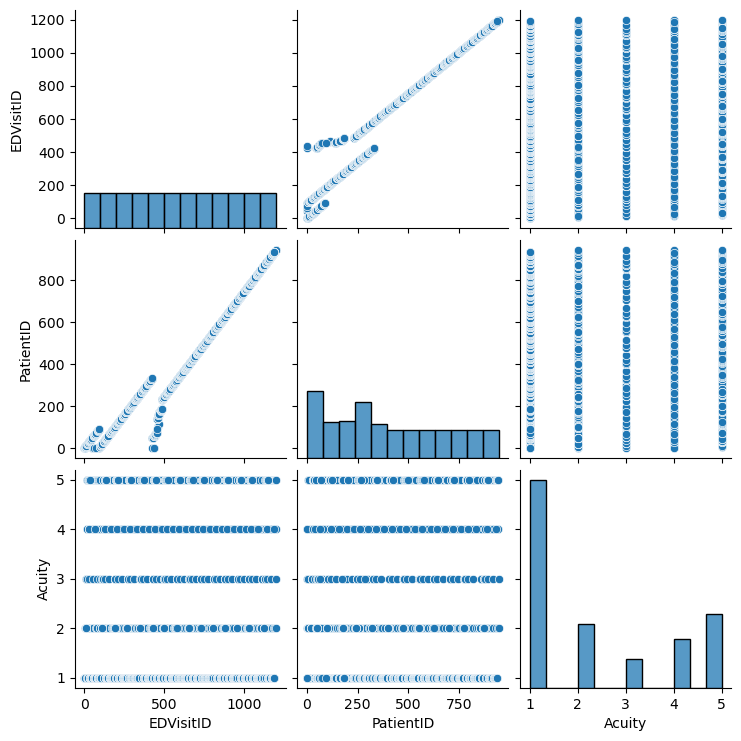

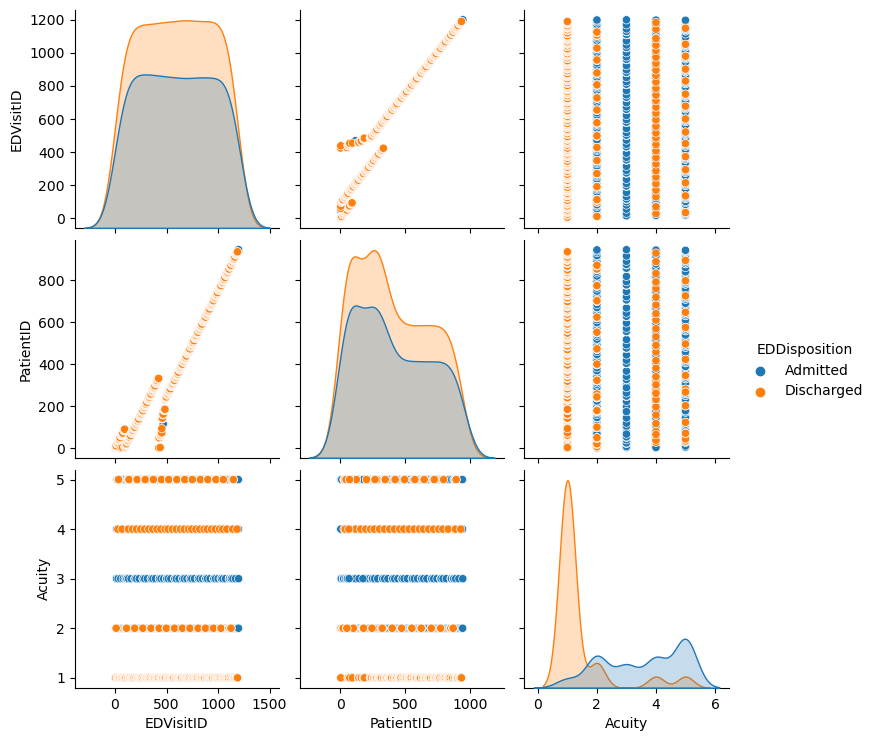

In [4]:
#3.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.
#------------------------------------------------------------------------------------
import seaborn as sns

# Create the Ed disposition pairplot
sns.pairplot(df2)
sns.pairplot(df2,hue ="EDDisposition")

In [ ]:
#4.Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)
#------------------------------------------------------------------------------------------------------------------------------------------------------
import psycopg2
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
   password="280814")
cursor = conn.cursor()
postgreSQL_select_Query = "select * from providers where providername like 'T%'"
cursor.execute(postgreSQL_select_Query)
print("Selecting rows from providers table using cursor.fetchall")
providers_records = cursor.fetchall()

print("Printing each row and it's columns values")
for row in providers_records:
        print("Provider name = ", row[1])
        #print("Model = ", row[1])
        #print("Price  = ", row[2], "\n")


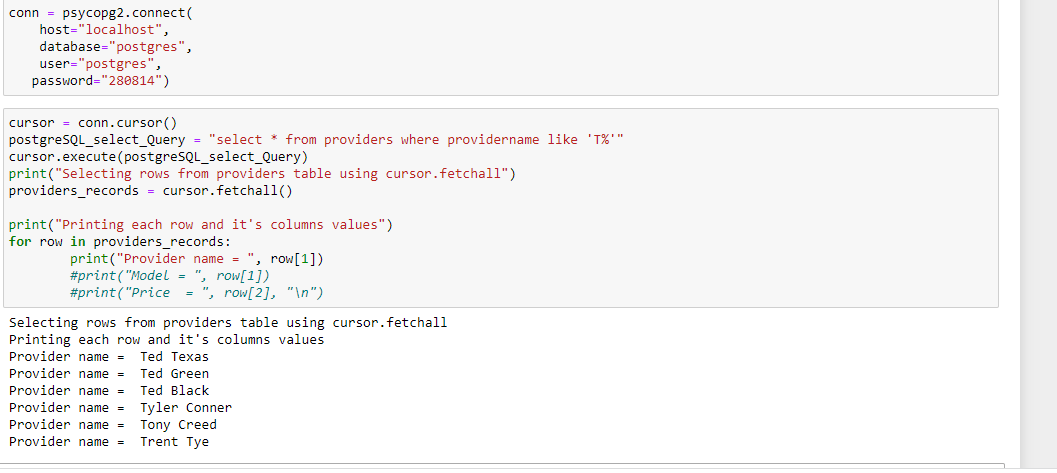

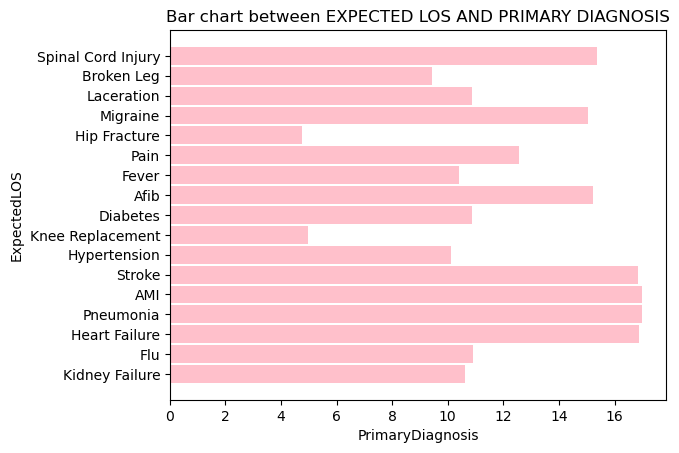

In [5]:
#5.Create a bar chart between expectedLOS & Primary diagnosis.
#--------------------------------------------------------------
import matplotlib.pyplot as plt

y_axis = df4.loc[: , "ExpectedLOS"]
x_axis = df4["PrimaryDiagnosis"]
plt.barh(x_axis, y_axis,height=0.9,color=('pink'))
plt.title('Bar chart between EXPECTED LOS AND PRIMARY DIAGNOSIS')
plt.xlabel('PrimaryDiagnosis')
plt.ylabel('ExpectedLOS')
plt.show()


In [6]:
#6.Find the last name of the patients, by getting the first name from the user.
#--------------------------------------------------------------------------------
import string
fname=input("Input your First Name : ")
fname = string.capwords(fname)
df=df1.loc[df1['FirstName'] == fname,'LastName']
print(df)


Input your First Name : lanni
0         Sue
129    Angear
Name: LastName, dtype: object


In [7]:
#7.Find the list of patients whose ExpectedLOS is greater than the value given by the user.
#--------------------------------------------------------------------------------------------
ReAdmissionRegistry = df4.iloc[:,[1,7]]
Patients = df1.iloc[:,[0,1,2]]
(lenthofStay)= float(input("Enter the lenth of Stay : "))
noofPatients = len([i for i in ReAdmissionRegistry['ExpectedLOS'] if i > lenthofStay])
print("Number of Patient greater than" , lenthofStay , "is" , noofPatients)
print("PatientID","FirstName","LastName","ExpectedLOS")
for PatientID1, ExpectedLOS in ReAdmissionRegistry.itertuples(index=False):
     if ExpectedLOS > lenthofStay:
        for PatientID2, FirstName, LastName in Patients.itertuples(index=False):
            if PatientID2 == PatientID1:
                        print(PatientID2,FirstName,LastName,ExpectedLOS)


Enter the lenth of Stay : 16
Number of Patient greater than 16.0 is 21
PatientID FirstName LastName ExpectedLOS
8 Alexandra Green 16.472256927259497
90 Cilka Alden 16.161805620328312
95 Abey Philipsson 16.83891828595611
134 Borer Stonehewer 16.22512602988089
215 Whitby Group 16.998213188933306
259 Mayert MacGettigen 16.30698316948985
302 Johann LLC 16.18918611446958
338 Scottie Phetteplace 16.753521233008957
351 Derk Garbutt 16.784041971729216
352 Evanne Woodford 16.989907376726443
355 Vitoria Cleaton 16.15437045083616
365 Johannes O'Daly 16.032984636363043
438 Daryl Buttriss 16.9748235974245
490 Angel Brandone 16.85193698107185
496 Lilyan Alekseev 16.65543023801477
560 Robyn Aucourte 16.78592551617726
587 Johnathan Philo 16.12251502209987
597 Oralle Applin 16.45626610650337
646 Andree Elliott 16.272193335768648
652 Megen Inc 16.62752132832736
663 Robyn Colborn 16.86788287978207


In [8]:
#8.Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.
#--------------------------------------------------------------------------------------------------------------
import plotly.express as px
from datetime import date, datetime
# This function converts given date to experience
def experience(datejoin):
    today = date.today() 
    return today.year - datejoin.year - ((today.month,
                                      today.day) < (datejoin.month,
                                                    datejoin.day))

df6['Provider Experience'] = df6['ProviderDateOnStaff'].apply(experience)
px.sunburst(df6, path=['ProviderSpecialty','ProviderName'], values='Provider Experience', color='Provider Experience', color_continuous_scale='agsunset')


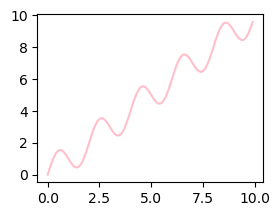

In [92]:
#9.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.
#----------------------------------------------------------------------------------------------------------------------------------

import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
plt.subplot(2, 2,1)
plt.plot(x,y,color=('pink'))
plt.show()


In [10]:
#10.Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).
#------------------------------------------------------------------------------------------------------
df2.groupby(["ReasonForVisit","EDDisposition"])["PatientID"].count().unstack(level=-1)


EDDisposition        Admitted  Discharged
ReasonForVisit                           
Accident                 39.0         NaN
Bleeding                 16.0        15.0
Car Accident             17.0         NaN
Chest Pain               94.0        15.0
Cough                     NaN         1.0
Fever                    46.0       188.0
Gun Shot                 16.0         NaN
Intoxication              NaN        30.0
Laceration                NaN        30.0
Migraine                 47.0       109.0
Pneumonia               136.0        65.0
Shortness of Breath      72.0        77.0
Stomach Ache             32.0       154.0

In [11]:
#11.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.
#--------------------------------------------------------------------------------------------------------------------------

df4['Date'] = pd.to_datetime(df4['DischargeDate']).dt.date
df4['Time'] = pd.to_datetime(df4['DischargeDate']).dt.time
df4[['DischargeDate', 'Date', 'Time']]


DischargeDate        Date             Time
0   2018-01-04 19:59:31.391  2018-01-04  19:59:31.391000
1   2018-01-04 21:28:51.898  2018-01-04  21:28:51.898000
2   2018-01-04 22:28:23.672  2018-01-04  22:28:23.672000
3   2018-01-05 05:47:04.933  2018-01-05  05:47:04.933000
4   2018-01-05 14:18:30.029  2018-01-05  14:18:30.029000
..                      ...         ...              ...
715 2018-03-07 21:22:10.061  2018-03-07  21:22:10.061000
716 2018-03-08 02:43:18.749  2018-03-08  02:43:18.749000
717 2018-03-08 09:27:18.377  2018-03-08  09:27:18.377000
718 2018-03-10 06:06:12.068  2018-03-10  06:06:12.068000
719 2018-03-10 20:38:30.568  2018-03-10  20:38:30.568000

[720 rows x 3 columns]

In [12]:
#12.Create a visualization on the count of patients based on primary diagnosis.
#-------------------------------------------------------------------------------
df=df4
groupbydiagnosis=df.groupby('PrimaryDiagnosis')['PatientID'].nunique().reset_index(name='countofpatients').sort_values('countofpatients')
fig = px.bar(groupbydiagnosis, x='PrimaryDiagnosis', y='countofpatients',
             hover_data=['countofpatients', 'PrimaryDiagnosis'], color=('countofpatients'),
             labels={'primd':'PrimaryDiagnosis'}, height=600)

fig.show()


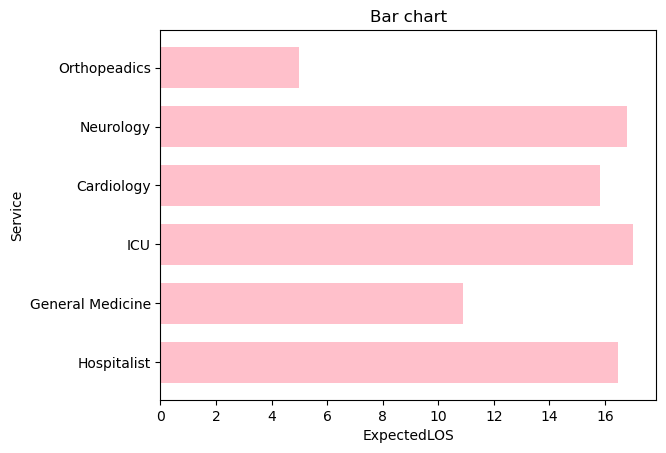

In [13]:
#13.Create a bar chart on service & expected length of stay.
#-----------------------------------------------------------

y_axis = df4.loc[: , "ExpectedLOS"]
x_axis = df4["Service"]
plt.barh(x_axis, y_axis,height=0.7,color=('pink'))
plt.title('Bar chart')
plt.xlabel('ExpectedLOS')
plt.ylabel('Service')
plt.show()


In [14]:
#14.Find the count of Spanish Speaking patients.
#-----------------------------------------------
df=len(df1[df1["Language"]=='Spanish'])
print('The number of Spanish Speaking patient:',df)


The number of Spanish Speaking patient: 110


In [15]:
#15.Create a boxplot on ExpectedLOS by taking service into account.
#-------------------------------------------------------------------
fig = px.box(x=df4["Service"], y=df4["ExpectedLOS"])
fig.show()


In [16]:
#16.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).
#-----------------------------------------------------------------------------------------------------------
df6 = df6.groupby('ProviderSpecialty')['ProviderName'].apply(list).reset_index(name='ProviderName')
print(df6)


  ProviderSpecialty                                       ProviderName
0        Cardiology  [Kent Kendall, Ryan Kevin, Tyler Conner, Baile...
1        Pediatrics  [Sally Sue, Mike Myers, Jordan Michael, Ted Te...
2       PrimaryCare  [Justin Time, Mike Joseph, Bridget Brenda, Bre...
3           Surgery  [Fred Man, Kim Kimberly, Sarah Ab, Abigail Mar...


In [ ]:
#17.Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question).
#------------------------------------------------------------------------------------------------------------------
cursor = conn.cursor()
postgreSQL_select_Query = "SELECT DATE_PART('YEAR', datescheduled) AS visit_year,COUNT(visitid) AS count FROM av GROUP BY DATE_PART('YEAR', datescheduled);"
cursor.execute(postgreSQL_select_Query)
print("Selecting rows from ambulatory visits scheduled table using cursor.fetchall")
av_records = cursor.fetchall()

print("Printing each row and it's columns values")
for row in av_records:
        print("visityear = ", row[0])
        print("count = ", row[1])
        #print("Price  = ", row[2], "\n")

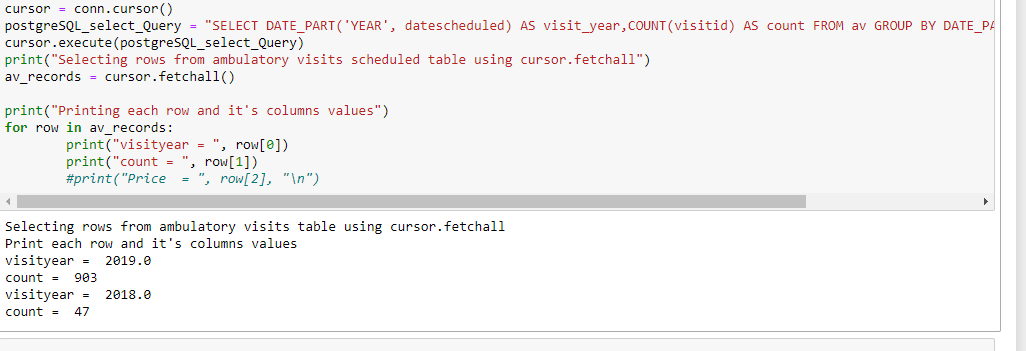

In [17]:
#18.Display using a donut chart the patient count in the ReAdmissionRegistry.
#------------------------------------------------------------------------------
import plotly.graph_objects as go
groupbydiagnosis=df4.groupby('PrimaryDiagnosis')['PatientID'].nunique().reset_index(name='countofpatients')
labels = df4["Service"]
values = groupbydiagnosis['countofpatients']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()


In [18]:
#19.Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.
#--------------------------------------------------------------------------------------------------------------
test = df5[(df5['ExpectedLOS'] > (max(df5["ExpectedLOS"])-min(df5["ExpectedLOS"])))]
print(test)


     AdmissionID  PatientID AdmissionDate           DischargeDate  \
12           398        134    2018-01-10 2018-01-15 16:43:47.026   
24           368        178    2018-01-14 2018-01-18 13:44:53.072   
31           369        198    2018-01-15 2018-01-31 14:28:07.437   
36           406        230    2018-01-18 2018-02-01 20:55:30.903   
47           174        352    2018-01-29 2018-02-02 21:21:45.388   
87           295        560    2018-02-13 2018-02-26 18:17:22.826   
92           297        588    2018-02-15 2018-02-26 14:46:54.780   
101          691        709    2018-02-21 2018-03-01 08:44:33.655   
110          549          8    2018-01-01 2018-01-07 15:39:25.987   
119          252         19    2018-01-01 2018-01-17 14:13:23.627   
127          550         27    2018-01-02 2018-01-13 07:34:46.603   
140          391         41    2018-01-03 2018-01-10 00:57:05.440   
157          609         59    2018-01-04 2018-01-09 01:18:34.182   
179          144         83    201

In [19]:
#20.Using a bar chart, which Service had the lowest count of Expected Mortality?
#--------------------------------------------------------------------------------
import plotly.express as px
groupbydiagnosis=df4.groupby('Service')['ExpectedMortality'].mean().reset_index(name='ExpectedMortality').sort_values('ExpectedMortality')
fig = px.bar(groupbydiagnosis, x='Service', y='ExpectedMortality',
             hover_data=['Service', 'ExpectedMortality'], color='Service',
             labels={'em':'ExpectedMortality'}, height=400)
fig.show()


In [93]:
#Importing dataset into python for Qs 21 to 40

xl = pd.ExcelFile('HospitalDatabase.xlsx')
sheets = xl.sheet_names
for i, sheet in enumerate(sheets):
    locals()['df'+ str(i+1)] = pd.read_excel(r'E:\Numpy_Ninja\Tableau\Python_Hackathon\HospitalDatabase.xlsx', sheet_name = sheet)

print(df1)#Patients
print(df2)#EDVisits
print(df3)#AmbulatoryVisits
print(df4)#ReadmissionRegistry
print(df5)#Discharges
print(df6)#Providers
print(df7)#EDUnique


     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3              

In [21]:
#21. Which reason of visit has maximum mortality rate?
#-----------------------------------------------------------------------------------------------------------------------------

result = pd.concat([df4,df7],axis = 1, join = 'inner')
print("The visit type with highest mortality is: \n", \
      result.groupby('ReasonForVisit')['ExpectedMortality'].mean().reset_index().\
      sort_values(['ExpectedMortality'],ascending = False).head(n=1))


The visit type with highest mortality is: 
   ReasonForVisit  ExpectedMortality
4          Fever           0.373723


In [22]:
#22. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).
#-----------------------------------------------------------------------------------------------------------------------------

df4['LOS'] = (df4['DischargeDate'] - df4['AdmissionDate']).dt.total_seconds() / 60 / 60 / 24
result = df4.groupby(['DischargeDisposition','Service'])['LOS'].mean()
print(result)


DischargeDisposition  Service         
Expired               Cardiology           9.357828
                      General Medicine     8.972359
                      Hospitalist         10.587996
                      ICU                  9.790686
                      Neurology           10.650761
                      Orthopeadics        12.327644
Home                  Cardiology          10.633869
                      General Medicine    10.298306
                      Hospitalist          9.522124
                      ICU                  9.575618
                      Neurology            9.677446
                      Orthopeadics         9.325017
Transfer              Cardiology          11.759865
                      General Medicine    11.075935
                      Hospitalist          9.248801
                      ICU                  9.479894
                      Neurology           12.261288
                      Orthopeadics        16.559908
Name: LOS, dtype: float64

In [94]:
#23. Add column 'Age' in Patient table.
#-----------------------------------------------------------------------------------------------------------------------------

# This function converts given date to age
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
 
df1['Age'] = df1['DateOfBirth'].apply(age)
df1


PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  Age  
0                     White  English   63  
1                     White  English   37  
2                     White  English   47  
3                     White  English   54  
4                     White  English   60  
..                      ...      ...  ...  
940  Black/African-American  English   36  
941  Black/African-American  English   52  
942  Black/African-American  English   40  
943  Black/African-American  English   59  
944  Black/African-American  English   50  

[945 rows x 8 columns]

In [24]:
#24. Using arrays and loops, find the count of patients based on gender.
#-----------------------------------------------------------------------------------------------------------------------------

male = 0
female = 0
for gender in df1['Gender']:
    if gender == 'Male':
        male+= 1
    else:
        female+=1
print('Count of Male patients: {} and Count of Female patients: {}'.format(male, female))


Count of Male patients: 537 and Count of Female patients: 408


#25. Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'.

The following is the recommendation of the American Heart Association and will be considered for the purpose of this question.
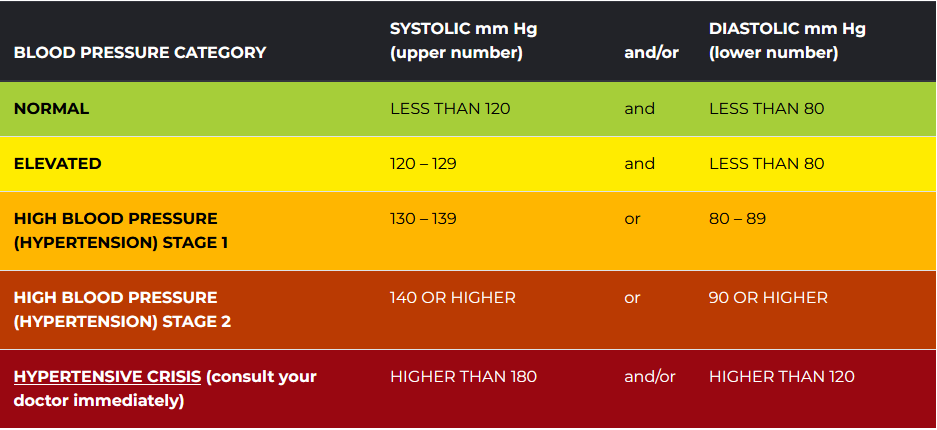

Mild Hypertension : SBP is (120 to 129) and DBP < 80 Moderate Hypertension : SBP is (130 to 139) or DBP is (80 to 89) High Hypertension : SBP >= 140 or DBP >= 90 Severe Hypertension : SBP > 180 and/or DBP > 120


In [25]:
#25. 
#-----------------------------------------------------------------------------------------------------------------------------

bpp = df3[(df3['BloodPressureSystolic']>120) & (df3['BloodPressureDiastolic'] > 50)]

#Funtion to define the blood pressure ranges:
def bp_range(sbp, dbp):
    if (119<sbp<130) and dbp < 80:
        return 'Mild'
    if (129<sbp<140) or (79< dbp < 90):
        return 'Moderate'
    if (139<sbp>180) or (90 < dbp < 120):
        return 'High'
    if sbp>180 or dbp > 120:
        return 'Severe'

#Add a column with stages for the BP ranges
bpp['Hypertension_Stages'] = bpp.apply(lambda x: bp_range(x['BloodPressureSystolic'], x['BloodPressureDiastolic']), axis =1)
bpp


C:\Users\Devina\AppData\Local\Temp\ipykernel_5576\2601444561.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
0        202         840          29  2019-03-19 2019-03-13 07:59:24.000   
1        436         820          25  2019-03-19 2019-02-24 07:10:31.043   
2        794         879          30  2019-04-02 2019-03-19 01:41:55.656   
3        799         884          37  2019-03-03 2019-02-25 01:25:39.696   
4        515          32          26  2019-03-16 2019-02-20 06:44:59.617   
..       ...         ...         ...         ...                     ...   
945      788         873           1  2019-03-27 2019-03-10 17:19:48.264   
946      703         855          36  2019-03-12 2019-02-19 02:27:52.664   
947      481         865          13  2019-05-03 2019-04-25 13:37:57.501   
948      398         635          10  2019-02-09 2019-02-08 11:40:35.137   
949      695         847          24  2019-03-04 2019-02-05 05:29:30.587   

     VisitDepartmentID     VisitType  BloodPressureSystolic  \
0                   10      Physical                  188.0   
1                    3     Follow Up                  179.0   
2                   11  Telemedicine                  133.0   
3                    4  Telemedicine                  132.0   
4                   11  Telemedicine                  131.0   
..                 ...           ...                    ...   
945                  5  Telemedicine                  187.0   
946                 10     Follow Up                  182.0   
947                 12           New                  150.0   
948                  1      Physical                  177.0   
949                 12     Follow Up                  165.0   

     BloodPressureDiastolic      Pulse VisitStatus Hypertension_Stages  
0                144.143427  83.044920     No Show                High  
1                118.876808  90.309544     No Show                High  
2                 98.749563  80.859776     No Show            Moderate  
3                 98.001270  82.184737     No Show            Moderate  
4                 85.115632  89.192362     No Show            Moderate  
..                      ...        ...         ...                 ...  
945              126.695141  70.049167    Canceled                High  
946              140.703502  73.380812    Canceled                High  
947               84.841197  61.625454    Canceled            Moderate  
948              125.037534  53.287036    Canceled              Severe  
949              116.879318  56.180317    Canceled                High  

[823 rows x 12 columns]

<Axes: title={'center': 'Distribution of Expected Mortality'}, ylabel='Density'>

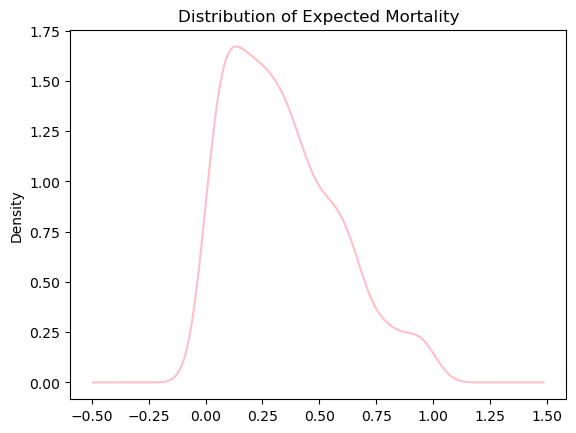

In [26]:
#26. Plot a graph to show the distribution of expected mortality.
#-----------------------------------------------------------------------------------------------------------------------------

df5['ExpectedMortality'].plot(kind='kde', title = 'Distribution of Expected Mortality', color = ('pink'))


In [27]:
#27. Which departmentID has maximum number of visits scheduled.
#-----------------------------------------------------------------------------------------------------------------------------

df3[['VisitDepartmentID']].groupby('VisitDepartmentID')['VisitDepartmentID'].count() \
.reset_index(name='Maximum Visits').sort_values(['Maximum Visits'], ascending=False).head(1)


VisitDepartmentID  Maximum Visits
10                 11             102

In [28]:
#28. Find the visit type with maximum 'No Show'
#-----------------------------------------------------------------------------------------------------------------------------

visit_type_result = df3.loc[df3['VisitStatus'] == 'No Show'].groupby(['VisitType']).count()\
.reset_index().sort_values(['VisitType'], ascending= False).head(1)
visit_type_result['VisitType']


2    Telemedicine
Name: VisitType, dtype: object

In [29]:
#29. Which demographic patients are prone to get Stroke?
#-----------------------------------------------------------------------------------------------------------------------------

df1[df1['PatientID'].isin(df5[df5['PrimaryDiagnosis'] == 'Stroke']['PatientID'])][['PatientID','Gender','Race','Language']]


PatientID  Gender                    Race Language
9           10    Male                   White  English
13          14    Male                   White  Spanish
18          19    Male                   White  Spanish
29          30  Female                   White  Spanish
34          35  Female                   White  Spanish
..         ...     ...                     ...      ...
600        601    Male  Black/African-American  English
601        602    Male  Black/African-American  English
610        611    Male  Black/African-American  English
641        642  Female  Black/African-American  English
671        672    Male                   White  English

[68 rows x 4 columns]

In [30]:
#30. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.
#-----------------------------------------------------------------------------------------------------------------------------

df6.loc[(11 < df6['ProviderID']) & (df6['ProviderID'] < 20) & (df6['ProviderSpecialty'] == 'Surgery')]


ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762
12          13  Abigail Marriot           Surgery 1998-11-08 12:25:45.705
13          14          Dave Yu           Surgery 1999-06-26 16:18:57.436
14          15  Christian Saint           Surgery 2000-08-27 00:12:40.326
15          16     Perry Pardon           Surgery 2001-02-13 11:49:17.862

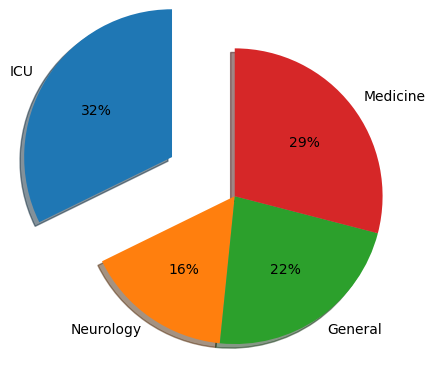

In [95]:
#32. Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] 
# & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.
#-----------------------------------------------------------------------------------------------------------------------------

import matplotlib.colors as mcolors

y = np.array([10,5,7,9])
mylabels = ["ICU", "Neurology", "General", "Medicine"]
myexplode = [y.max()*0.05, 0, 0, 0]
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,startangle=90, \
        autopct = '%d%%' , colors = mcolors.TABLEAU_COLORS)
# show the plot
plt.show()


In [33]:
#31. If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.
#-----------------------------------------------------------------------------------------------------------------------------

sample = df1
sample['FirstName'].mask(df1['Gender']=='Male',('Mr. '+sample['FirstName']), inplace = True)
sample['FirstName'].mask(df1['Gender']=='Female',('Ms. '+sample['FirstName']), inplace = True)
sample


PatientID     FirstName  LastName             DateOfBirth Gender  \
0            1     Mr. Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Mr. Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Mr. Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Mr. Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Mr. Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...           ...       ...                     ...    ...   
940        941       Mr. Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Mr. Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Mr. Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Mr. Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Mr. Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  Age  
0                     White  English   63  
1                     White  English   37  
2                     White  English   47  
3                     White  English   54  
4                     White  English   60  
..                      ...      ...  ...  
940  Black/African-American  English   36  
941  Black/African-American  English   52  
942  Black/African-American  English   40  
943  Black/African-American  English   59  
944  Black/African-American  English   50  

[945 rows x 8 columns]

<Axes: ylabel='Density'>

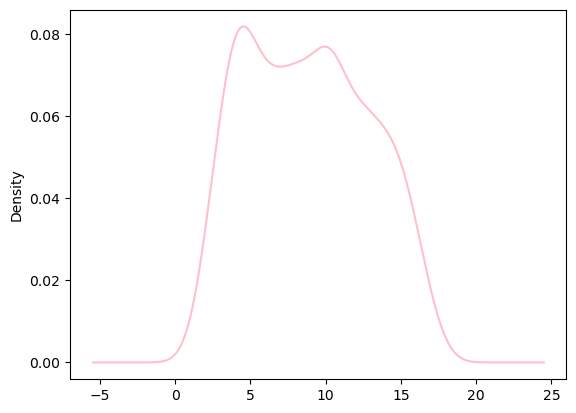

In [34]:
#33. Plot a graph to show the distribution of expected length of stay.
#-----------------------------------------------------------------------------------------------------------------------------

df4['ExpectedLOS'].plot(kind = 'kde',color = ('pink'))


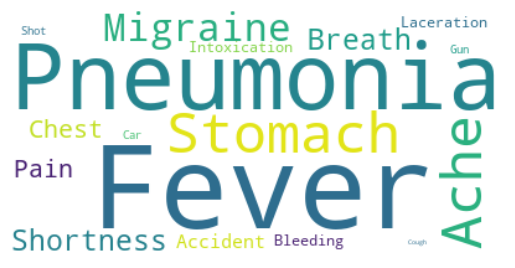

In [35]:
#34. Create a WordCloud Chart with Reason For Visit.
#-----------------------------------------------------------------------------------------------------------------------------

from wordcloud import WordCloud
text = " ".join(reason for reason in df2['ReasonForVisit'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [96]:
#35. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. 
#When the value is less than 6, print as -1,else print 99.
#-----------------------------------------------------------------------------------------------------------------------------

a= np.arange(1,31).reshape(6,5)
print(a)
result_arr=np.concatenate((a[0:2:,3:], a[-2:6:,3:]),axis=0)
print('Array slicing: \n', result_arr)
print('Array slicing after substitution: \n', np.where(result_arr <6,-1,99))


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Array slicing: 
 [[ 4  5]
 [ 9 10]
 [24 25]
 [29 30]]
Array slicing after substitution: 
 [[-1 -1]
 [99 99]
 [99 99]
 [99 99]]


In [37]:
#36. Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)
#-----------------------------------------------------------------------------------------------------------------------------

df3.loc[(df3['BloodPressureSystolic'] > 180) & (df3['BloodPressureDiastolic'] > 120)]


VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
0        202         840          29  2019-03-19 2019-03-13 07:59:24.000   
9        726         878          16  2019-04-04 2019-03-10 15:52:39.962   
38       506         890          15  2019-01-24 2019-01-21 05:07:43.641   
67       504         888          13  2019-01-22 2019-01-09 23:52:38.598   
70       509         893           2  2019-01-27 2019-01-26 05:11:07.934   
..       ...         ...         ...         ...                     ...   
922      483         867          15  2019-01-01 2018-12-04 12:16:32.105   
934      482         866          14  2019-05-04 2019-04-13 07:54:49.580   
942      392         617           4  2019-02-03 2019-02-01 02:50:08.377   
945      788         873           1  2019-03-27 2019-03-10 17:19:48.264   
946      703         855          36  2019-03-12 2019-02-19 02:27:52.664   

     VisitDepartmentID     VisitType  BloodPressureSystolic  \
0                   10      Physical                  188.0   
9                    9  Telemedicine                  183.0   
38                  10  Telemedicine                  184.0   
67                   8  Telemedicine                  185.0   
70                   5  Telemedicine                  183.0   
..                 ...           ...                    ...   
922                  6           New                  186.0   
934                  5           New                  190.0   
942                  7  Telemedicine                  185.0   
945                  5  Telemedicine                  187.0   
946                 10     Follow Up                  182.0   

     BloodPressureDiastolic      Pulse VisitStatus  
0                144.143427  83.044920     No Show  
9                122.982498  68.800091     No Show  
38               147.093192  71.160985     No Show  
67               154.745416  75.362150     No Show  
70               150.514924  78.979142     No Show  
..                      ...        ...         ...  
922              140.252935  88.801153    Canceled  
934              124.736359  69.731779    Canceled  
942              127.419321  84.645360    Canceled  
945              126.695141  70.049167    Canceled  
946              140.703502  73.380812    Canceled  

[101 rows x 11 columns]

In [38]:
#37. Display the data where actual LOS is greater than expected LOS.
#-----------------------------------------------------------------------------------------------------------------------------

df4.loc[(df4['ExpectedLOS'] < ((df4['DischargeDate']-df4['AdmissionDate']).dt.total_seconds() / 60 / 60 / 24))]


AdmissionID  PatientID AdmissionDate           DischargeDate  \
1            635          2    2018-01-01 2018-01-04 21:28:51.898   
2            606          3    2018-01-01 2018-01-04 22:28:23.672   
3            587          5    2018-01-01 2018-01-05 05:47:04.933   
10           568         12    2018-01-01 2018-01-09 09:21:47.300   
11           107         13    2018-01-01 2018-01-09 21:34:42.467   
..           ...        ...           ...                     ...   
715          521        738    2018-02-22 2018-03-07 21:22:10.061   
716          548        739    2018-02-22 2018-03-08 02:43:18.749   
717          509        740    2018-02-22 2018-03-08 09:27:18.377   
718          605        741    2018-02-22 2018-03-10 06:06:12.068   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
1                   Home  General Medicine              Flu     3.825969   
2                   Home  General Medicine              Flu     3.382493   
3                   Home  General Medicine              Flu     3.763352   
10                  Home       Hospitalist        Pneumonia     7.162811   
11                  Home       Hospitalist              Flu     4.554479   
..                   ...               ...              ...          ...   
715                 Home        Cardiology              AMI    13.725405   
716                 Home               ICU        Pneumonia    11.355456   
717                 Home       Hospitalist        Pneumonia     4.819882   
718                 Home  General Medicine              Flu     3.123064   
719             Transfer  General Medicine         Diabetes     7.195441   

     ExpectedMortality  ReadmissionFlag  DaysToReadmission  \
1             0.604562              1.0                2.0   
2             0.266137              1.0                3.0   
3             0.307527              1.0                4.0   
10            0.671473              1.0                5.0   
11            0.266584              1.0                5.0   
..                 ...              ...                ...   
715           0.388319              NaN                NaN   
716           0.088518              NaN                NaN   
717           0.503308              NaN                NaN   
718           0.655870              NaN                NaN   
719           0.286439              NaN                NaN   

     EDVisitAfterDischargeFlag        LOS  
1                          1.0   3.895045  
2                          1.0   3.936385  
3                          1.0   4.241029  
10                         1.0   8.390131  
11                         1.0   8.899103  
..                         ...        ...  
715                        NaN  13.890394  
716                        NaN  14.113411  
717                        NaN  14.393963  
718                        NaN  16.254306  
719                        NaN  16.860076  

[416 rows x 13 columns]

In [39]:
#38. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
#-----------------------------------------------------------------------------------------------------------------------------

df1[['FirstName','LastName']].loc[101:200]


FirstName    LastName
101     Mr. Gipsy    Frankton
102    Mr. Jethro      Wharin
103       Mr. Viv     Aylward
104     Mr. Swift   Dreschler
105     Mr. Fadel  Jacquemard
..            ...         ...
196      Mr. Noam    Laguerre
197      Mr. Arie     Bayless
198    Mr. Janaye     O'Mohun
199      Mr. Fonz       Group
200  Mr. Cummings      Pickup

[100 rows x 2 columns]

In [40]:
#39. Delete the column 'DischargeDispostion' iteratively.
#-----------------------------------------------------------------------------------------------------------------------------

df5_copy = df5
for col in df5_copy.columns:
    if 'DischargeDisposition' in col:
        del df5_copy[col]
print(df5_copy)


     AdmissionID  PatientID AdmissionDate           DischargeDate  \
0              1          9    2018-01-01 2018-01-07 18:06:06.408   
1            257         93    2018-01-06 2018-01-18 02:59:04.667   
2            152        101    2018-01-07 2018-01-11 16:16:06.782   
3            361        102    2018-01-07 2018-01-15 04:48:33.134   
4            258        103    2018-01-07 2018-01-15 13:32:36.157   
..           ...        ...           ...                     ...   
715          715        716    2018-02-21 2018-03-06 03:31:05.262   
716          698        723    2018-02-22 2018-02-26 15:09:02.584   
717          704        724    2018-02-22 2018-02-27 07:59:32.385   
718          716        733    2018-02-22 2018-03-05 12:31:55.958   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

              Service PrimaryDiagnosis  ExpectedLOS  ExpectedMortality  
0          Cardiology              AMI     9.646857           0.061540  
1          Cardiology    

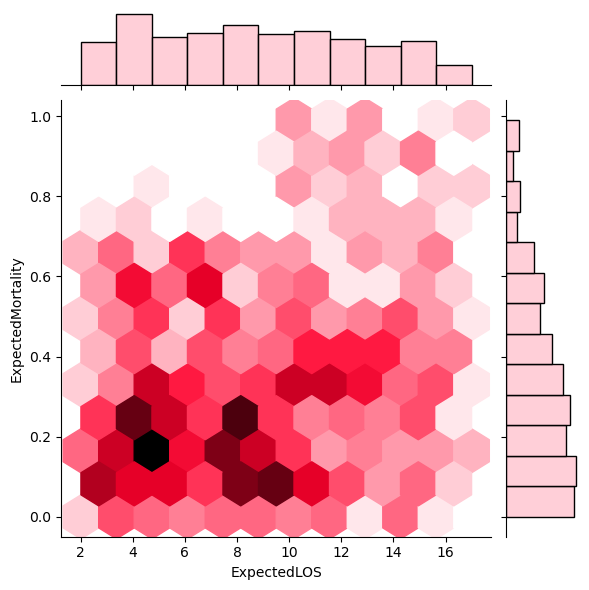

In [97]:
#40. Create a jointplot on expected mortality & expected length of stay.
#-----------------------------------------------------------------------------------------------------------------------------

sns.jointplot(x = "ExpectedLOS", y = "ExpectedMortality", kind = "hex", data = df5, color = 'pink')
# show the plot
plt.show()


In [42]:
#Importing data set into python for Qs 41 to 60

hospital_dataset=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Patients")
ED=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDVisits")
AV=pd.read_excel("HospitalDatabase.xlsx",sheet_name="AmbulatoryVisits")
RR=pd.read_excel("HospitalDatabase.xlsx",sheet_name="ReAdmissionRegistry")
Disch=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Discharges")
Prov=pd.read_excel("HospitalDatabase.xlsx",sheet_name="Providers")
EDU=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDUnique")


In [43]:
# Calculate age code

# This function converts given date to age
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

hospital_dataset['Age'] = hospital_dataset['DateOfBirth'].apply(age)
  
display(hospital_dataset)

PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  Age  
0                     White  English   63  
1                     White  English   37  
2                     White  English   47  
3                     White  English   54  
4                     White  English   60  
..                      ...      ...  ...  
940  Black/African-American  English   36  
941  Black/African-American  English   52  
942  Black/African-American  English   40  
943  Black/African-American  English   59  
944  Black/African-American  English   50  

[945 rows x 8 columns]

In [44]:
#Analysis for Qs41
df = pd.merge(hospital_dataset, RR, on='PatientID')
print(df)


     PatientID   FirstName LastName             DateOfBirth  Gender   Race  \
0            1       Lanni      Sue 1960-01-01 00:00:00.000    Male  White   
1            2         Far    Myers 1985-11-15 02:08:42.090    Male  White   
2            3     Devlin   Michael 1976-04-15 02:52:09.762    Male  White   
3            5       Tann      Bama 1962-05-01 19:12:58.950    Male  White   
4            6   Jerrilyn      Kane 1969-03-30 09:36:56.550    Male  White   
..         ...         ...      ...                     ...     ...    ...   
715        738  Konopelski    Group 1975-11-28 02:34:22.237  Female  White   
716        739     Chandal    Group 1985-04-19 17:45:10.810  Female  White   
717        740       Tiena  Mahomet 1960-07-23 09:04:25.637  Female  White   
718        741      Rogahn    Group 1960-03-14 20:14:13.941  Female  White   
719        742    Ondricka   Hegley 1980-11-26 20:22:21.885  Female  White   

    Language  Age  AdmissionID AdmissionDate           Discharg

In [45]:
#41. Find the age prone to get stroke.

print (df.loc[df.PrimaryDiagnosis=='Stroke'].value_counts('Age'))


Age
58    7
47    4
61    4
40    4
52    4
42    4
49    4
55    3
54    3
57    3
62    3
44    3
39    3
38    3
48    2
37    2
60    2
41    2
59    1
36    1
50    1
53    1
51    1
46    1
45    1
63    1
dtype: int64


In [46]:
#42
result = Disch.groupby('PrimaryDiagnosis')['ExpectedMortality'].mean()

print (result)

PrimaryDiagnosis
AMI                   0.235146
Afib                  0.304235
Broken Leg            0.275440
Diabetes              0.286476
Fever                 0.296601
Flu                   0.272976
Heart Failure         0.385678
Hip Fracture          0.373310
Hypertension          0.296555
Kidney Failure        0.247592
Knee Replacement      0.290385
Laceration            0.273022
Migraine              0.567372
Pain                  0.548264
Pneumonia             0.374618
Spinal Cord Injury    0.200279
Stroke                0.442433
Name: ExpectedMortality, dtype: float64


In [47]:
#43
colNames = hospital_dataset.FirstName[hospital_dataset.FirstName.str.contains(pat = 'lau')] 


colNames1=hospital_dataset.LastName[hospital_dataset.LastName.str.contains(pat = 'lau')] 

rs=hospital_dataset
print(colNames,colNames1,rs)

369    Zulauf
382    Zulauf
454    Zulauf
463    Zulauf
818    Zulauf
830    Zulauf
910    Zulauf
Name: FirstName, dtype: object 850    Klausen
906    Klausen
Name: LastName, dtype: object      PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:

In [50]:
#44

print(np.percentile(df.Age, [25, 50, 75,100]))
print(df.Age.describe())

[43. 49. 57. 63.]
count    720.000000
mean      49.538889
std        7.907929
min       35.000000
25%       43.000000
50%       49.000000
75%       57.000000
max       63.000000
Name: Age, dtype: float64


In [51]:
#45
x = list(enumerate(hospital_dataset))
print(x)

[(0, 'PatientID'), (1, 'FirstName'), (2, 'LastName'), (3, 'DateOfBirth'), (4, 'Gender'), (5, 'Race'), (6, 'Language'), (7, 'Age')]


In [52]:
#46
mel_count = (AV['VisitStatus'] == 'Canceled').sum() 
print("There are {num} instances of 'Canceled'. ".format(num=mel_count)) 

There are 60 instances of 'Canceled'. 


In [53]:
#47
display(AV.groupby('PatientMRN')['Pulse'].max())

PatientMRN
4      56.678398
5      59.360770
6      67.425256
7      97.442262
8      71.301478
         ...    
913    77.562854
914    67.397064
915    97.802223
916    99.794604
917    67.455019
Name: Pulse, Length: 273, dtype: float64

<Axes: >

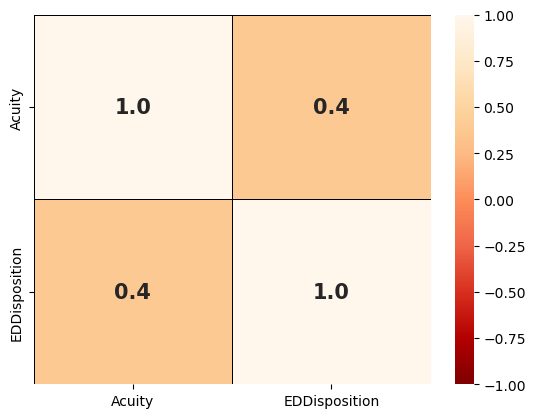

In [98]:
#48

sns.heatmap(ED.corr()
           ,vmin=-1
           ,vmax=1
           ,center=0
           ,cmap='OrRd_r'
           ,annot=True
           ,fmt='.1f'
           ,annot_kws=dict(size=15,weight='bold')
           ,linecolor='black'
           ,linewidths=0.5)

<Axes: xlabel='VisitDepartmentID,PatientMRN'>

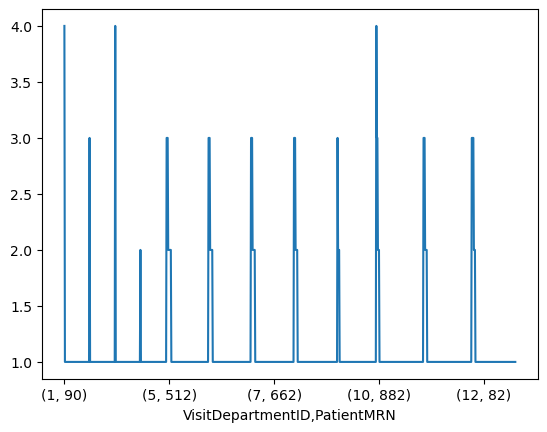

In [55]:
#49
AV.groupby('VisitDepartmentID')['PatientMRN'].value_counts().plot()


In [56]:
#50
display(ED.loc[(ED['ReasonForVisit']=='Migraine') | (ED['ReasonForVisit']=='Pneumonia') & (ED['Acuity']>=2)])


EDVisitID  PatientID               VisitDate         EDDischargeTime  \
1            12         12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
3            14         14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
11           29         29 2020-01-01 06:51:28.639 2020-01-02 05:57:01.639   
12           30         30 2020-01-01 07:25:54.177 2020-01-01 23:30:20.151   
13           31         31 2020-01-01 07:32:51.917 2020-01-01 19:55:46.991   
...         ...        ...                     ...                     ...   
1162       1124        870 2020-01-14 15:31:20.038 2020-01-15 10:28:29.406   
1175       1151        897 2020-01-15 00:24:27.036 2020-01-15 02:11:30.139   
1182       1162        908 2020-01-15 03:20:10.313 2020-01-15 05:12:01.600   
1184       1164        910 2020-01-15 04:02:21.645 2020-01-15 19:45:03.534   
1189       1178        924 2020-01-15 09:26:24.572 2020-01-15 13:51:44.936   

      Acuity ReasonForVisit EDDisposition  
1          2       Migraine      Admitted  
3          3       Migraine      Admitted  
11         2      Pneumonia      Admitted  
12         3      Pneumonia      Admitted  
13         4      Pneumonia      Admitted  
...      ...            ...           ...  
1162       2       Migraine    Discharged  
1175       1       Migraine    Discharged  
1182       1       Migraine    Discharged  
1184       1       Migraine    Discharged  
1189       1       Migraine    Discharged  

[291 rows x 7 columns]

In [57]:
#51
print("Enter reason for visit: ")
limit = str(input())
print (ED.loc[ED.ReasonForVisit==limit].value_counts(ED.PatientID))

Enter reason for visit: 
Migraine
PatientID
12     2
297    2
47     2
2      1
591    1
      ..
247    1
249    1
255    1
257    1
924    1
Length: 153, dtype: int64


In [58]:
#52
bps=AV.loc[AV['BloodPressureSystolic'].idxmax()]
print(bps)

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object


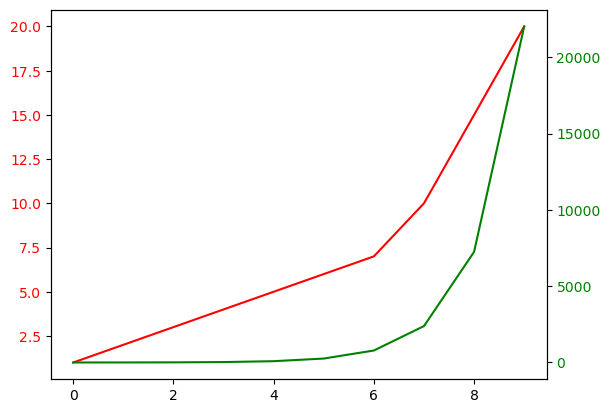

In [59]:
#53

linear_sequence = [1, 2, 3, 4, 5, 6, 7, 10, 15, 20]
exponential_sequence = np.exp(np.linspace(0, 10, 10))

fig, ax = plt.subplots()


ax.plot(linear_sequence, color='red')
ax.tick_params(axis='y', labelcolor='red')


ax2 = ax.twinx()


ax2.plot(exponential_sequence, color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

In [60]:
#54
bps1=AV.loc[AV['BloodPressureDiastolic'].idxmin()]
print(bps1)

VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.181000
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      53.310495
VisitStatus                                Completed
Name: 757, dtype: object


In [61]:
#55
RR['ReadmissionFlag'] = RR['ReadmissionFlag'].fillna(0)
RR.head()

AdmissionID  PatientID AdmissionDate           DischargeDate  \
0          389          1    2018-01-01 2018-01-04 19:59:31.391   
1          635          2    2018-01-01 2018-01-04 21:28:51.898   
2          606          3    2018-01-01 2018-01-04 22:28:23.672   
3          587          5    2018-01-01 2018-01-05 05:47:04.933   
4          640          6    2018-01-01 2018-01-05 14:18:30.029   

  DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                 Home       Hospitalist   Kidney Failure     6.717771   
1                 Home  General Medicine              Flu     3.825969   
2                 Home  General Medicine              Flu     3.382493   
3                 Home  General Medicine              Flu     3.763352   
4                 Home               ICU    Heart Failure    13.650953   

   ExpectedMortality  ReadmissionFlag  DaysToReadmission  \
0           0.010046              0.0                NaN   
1           0.604562              1.0                2.0   
2           0.266137              1.0                3.0   
3           0.307527              1.0                4.0   
4           0.408898              0.0                NaN   

   EDVisitAfterDischargeFlag  
0                        NaN  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN

In [62]:
#56
hospital_dataset[~hospital_dataset['PatientID'].isin(RR['PatientID'])]

PatientID FirstName  LastName             DateOfBirth Gender  \
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
134        135     Cally   Aylward 1962-01-13 00:11:17.581   Male   
144        145    Sheena       LLC 1966-10-17 13:24:21.621   Male   
188        189    Rempel     Group 1974-07-17 04:55:39.964   Male   
199        200      Fonz     Group 1964-01-15 01:57:57.966   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  Age  
3                     White  English   54  
134  Black/African-American  English   61  
144  Black/African-American  English   56  
188  Black/African-American  English   48  
199  Black/African-American  English   59  
..                      ...      ...  ...  
940  Black/African-American  English   36  
941  Black/African-American  English   52  
942  Black/African-American  English   40  
943  Black/African-American  English   59  
944  Black/African-American  English   50  

[241 rows x 8 columns]

In [63]:
#57
rf=ED[ED['Acuity']==5]
print(rf)

      EDVisitID  PatientID               VisitDate         EDDischargeTime  \
7            18         18 2020-01-01 04:39:40.091 2020-01-02 03:25:07.379   
8            19         19 2020-01-01 04:56:11.608 2020-01-02 04:31:45.968   
9            26         26 2020-01-01 06:14:46.240 2020-01-01 15:34:00.868   
10           27         27 2020-01-01 06:27:42.483 2020-01-01 18:30:35.922   
17           45         45 2020-01-01 11:53:16.342 2020-01-01 21:20:18.854   
...         ...        ...                     ...                     ...   
1075        979        725 2020-01-13 01:52:00.052 2020-01-14 01:51:32.779   
1116       1050        796 2020-01-13 21:48:34.838 2020-01-14 10:25:44.839   
1117       1051        797 2020-01-13 22:13:47.779 2020-01-14 06:39:37.586   
1171       1147        893 2020-01-14 23:04:58.584 2020-01-15 09:56:39.625   
1172       1148        894 2020-01-14 23:31:17.382 2020-01-15 07:31:45.241   

      Acuity       ReasonForVisit EDDisposition  
7          5 

In [64]:
#58
hospital_dataset[(hospital_dataset['DateOfBirth']>='1986-01-01') & (hospital_dataset['DateOfBirth']<='1986-12-31')]

PatientID   FirstName    LastName             DateOfBirth  Gender  \
23          24    Gabriel       Joseph 1986-05-31 09:36:05.716    Male   
24          25    Lincoln       Brenda 1986-07-24 17:36:00.791    Male   
29          30         Ala     Halpert 1986-11-26 10:44:22.628  Female   
72          74      Lolita       Darci 1986-01-08 02:34:04.596  Female   
164        165       Fadel    Bernardt 1986-05-29 00:35:58.694    Male   
238        239     Bentley      Kippax 1986-02-11 06:22:40.734    Male   
367        368        Vale      Olanda 1986-04-15 00:49:58.690  Female   
373        374       Britt     Dureden 1986-11-19 23:50:47.955  Female   
386        387   Cristabel      Chatel 1986-07-10 16:27:30.640    Male   
415        416  Constantia       Group 1986-03-26 06:37:22.525  Female   
452        453      Morgan   Scrowston 1986-12-19 21:34:24.472  Female   
561        562         Dom      Baglow 1986-07-26 14:43:49.240    Male   
568        569     Ignazio     Melling 1986-12-25 03:40:43.884    Male   
595        596    Homenick       Rings 1986-02-24 15:08:30.404    Male   
639        640      Hashim       Slark 1986-10-13 10:40:43.596  Female   
643        644       Ellie  Ramsbotham 1986-05-21 16:35:52.711  Female   
674        675   Llewellyn       Group 1986-11-09 17:15:11.196  Female   
714        715       Niles        Shaw 1986-12-15 06:31:44.358    Male   
733        734      Yvette         Inc 1986-11-23 02:32:12.587  Female   
777        778     Siouxie       Group 1986-04-28 03:25:01.182    Male   
852        853       Carly       Group 1986-11-21 02:44:49.632  Female   
868        869       Worth   Pickering 1986-12-22 08:21:02.691  Female   
877        878        Arni     Baldack 1986-04-10 13:18:15.354    Male   
909        910     Kuvalis    Coupland 1986-05-23 19:23:27.752    Male   
922        923    Rebbecca  Rollingson 1986-09-29 11:58:56.983    Male   
940        941         Wat     Fideler 1986-05-26 00:01:19.761    Male   

                       Race Language  Age  
23                    White  Spanish   36  
24                    White  Spanish   36  
29                    White  Spanish   36  
72                    White  Spanish   37  
164  Black/African-American  English   36  
238  Black/African-American  English   37  
367                   White  English   37  
373                   White  English   36  
386                   White  English   36  
415                   White  English   37  
452                   White  English   36  
561  Black/African-American  English   36  
568  Black/African-American  English   36  
595  Black/African-American  English   37  
639  Black/African-American  English   36  
643  Black/African-American  English   36  
674                   White  English   36  
714                   White  English   36  
733                   White  English   36  
777                   White  English   36  
852                   White  English   36  
868                   White  English   36  
877                   White  English   37  
909  Black/African-American  English   36  
922  Black/African-American  English   36  
940  Black/African-American  English   36

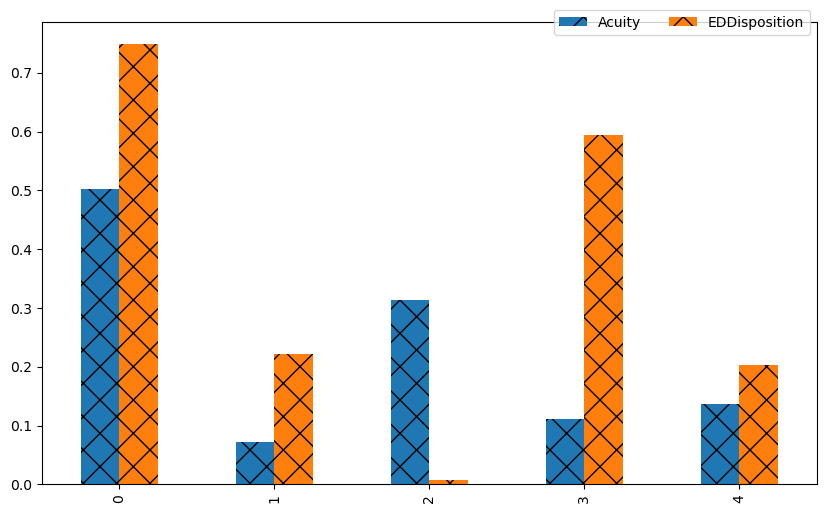

In [65]:
#59

ED = pd.DataFrame(np.random.rand(5, 2), columns=['Acuity', 'EDDisposition'])
ax = plt.figure(figsize=(10, 6)).add_subplot(111)
ED.plot(ax=ax, kind='bar', legend=False)

bars = ax.patches
hatches = ''.join(h*len(df) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.legend(loc='center right', bbox_to_anchor=(1, 1), ncol=4)

C:\Users\Devina\AppData\Local\Temp\ipykernel_5576\2839393515.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



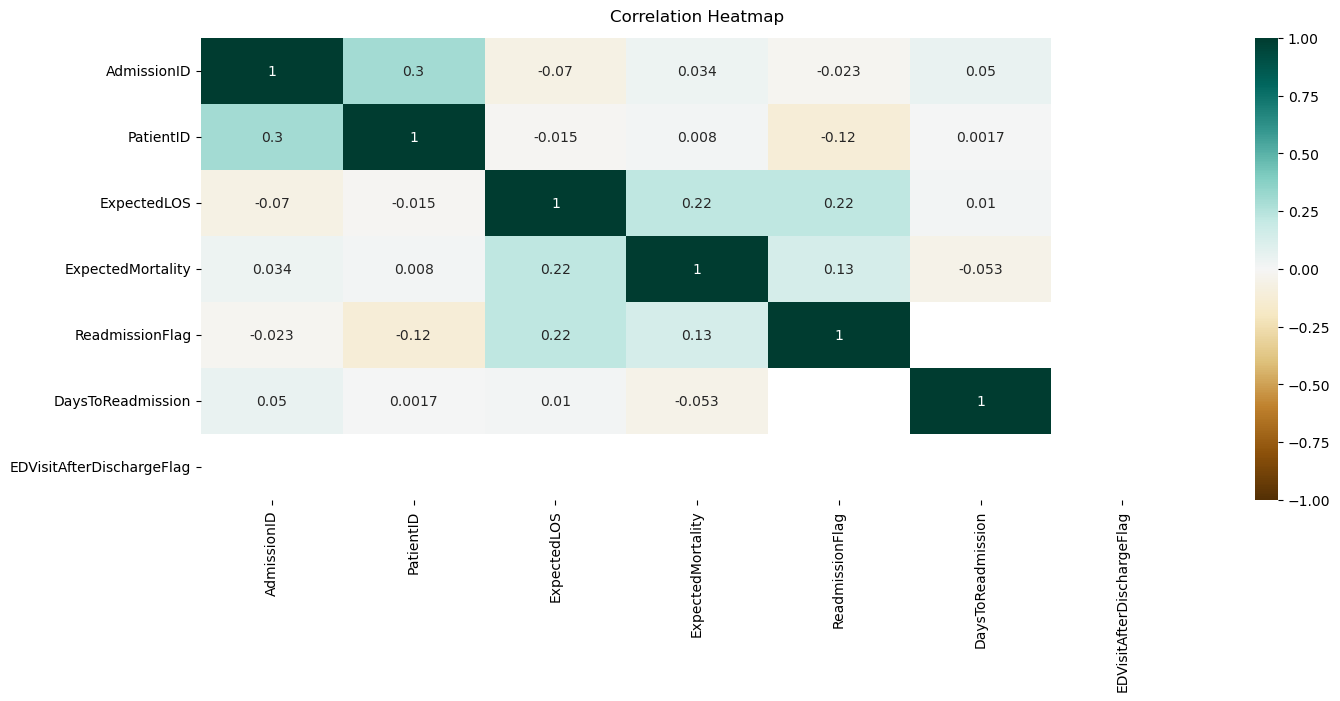

In [99]:
#60

plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(RR.corr(), vmin=-1, vmax=1, annot=True,  cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [67]:
#Importing data set into python for Qs 61 to 80

xl = pd.ExcelFile('HospitalDatabase.xlsx')
sheets = xl.sheet_names
for i, sheet in enumerate(sheets):
    locals()['df'+ str(i+1)] = pd.read_excel('HospitalDatabase.xlsx', sheet_name = sheet)
print(df1)
print(df2)
print(df3)
print(df4)
print(df5)
print(df6)
print(df7)

     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3              

In [100]:
#Q61: np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

myArray1 = np.arange (1,31)
myArray2 = myArray1.reshape(6, 5)

print (myArray1)
print (myArray2)

# How to get elements with values 11, 12, 16 and 17

# 11, Row 3 column 1, substract 1 to get the array index
print(myArray2[2, 0])

#12, Row 3 column 2
print(myArray2[2, 1])


#16, Row 4 column 1
print(myArray2[3, 0])


#17, Row 4 column 2
print(myArray2[3, 1])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
11
12
16
17


In [69]:
#Q62: Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

df2.groupby(['Acuity','EDDisposition'])['EDDisposition'].count().reset_index(name='CountOfPatients')


Acuity EDDisposition  CountOfPatients
0       1      Admitted               32
1       1    Discharged              558
2       2      Admitted              116
3       2    Discharged               66
4       3      Admitted               81
5       4      Admitted              107
6       4    Discharged               30
7       5      Admitted              179
8       5    Discharged               30

In [101]:
#63: List male patients over the age of 60 who have undergone surgery from January-March 2019.
# First adding Age column

# This function converts given date to age
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
 
df1['Age'] = df1['DateOfBirth'].apply(age)
#df1A

new = df1[df1['Gender']=='Male']
new1 = new[new['Age']>60]
surgery = df6[df6['ProviderSpecialty'] == 'Surgery']
new1[df3['ProviderID'].isin(surgery['ProviderID'])]


C:\Users\Devina\AppData\Local\Temp\ipykernel_5576\2559027144.py:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



PatientID  FirstName   LastName             DateOfBirth Gender  \
18          19  Daugherty     Conner 1960-04-04 10:00:34.189   Male   
150        151      Levon   Bonifant 1960-12-17 15:28:38.898   Male   
203        204    Gerhold    Cockett 1961-06-06 16:19:37.115   Male   
216        217   Gratiana      Group 1961-10-08 14:54:58.793   Male   
425        426       Bins    Garbutt 1961-12-30 23:52:41.522   Male   
443        444       Isis  Grimditch 1960-03-01 01:11:11.217   Male   
482        483       Angy     Hassen 1961-10-24 16:24:56.342   Male   
559        560      Robyn   Aucourte 1960-02-11 20:56:05.193   Male   
716        717       Hahn      Baudy 1961-03-02 06:09:40.630   Male   

                       Race Language  Age  
18                    White  Spanish   63  
150  Black/African-American  English   62  
203  Black/African-American  English   61  
216  Black/African-American  English   61  
425                   White  English   61  
443                   White  English   63  
482  Black/African-American  English   61  
559  Black/African-American  English   63  
716                   White  English   62

In [71]:
#Q64: Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

SplitName = df6.ProviderName.str.split(expand=True)  
SplitName.columns =['ProviderFirstName','ProviderLastName']
print(SplitName)


   ProviderFirstName ProviderLastName
0              Sally              Sue
1               Mike            Myers
2             Jordan          Michael
3                Ted            Texas
4                Ala             Bama
5              Harry             Kane
6              Barry              Bar
7                Ted            Green
8                Ted            Black
9               Fred              Man
10               Kim         Kimberly
11             Sarah               Ab
12           Abigail          Marriot
13              Dave               Yu
14         Christian            Saint
15             Perry           Pardon
16              Kent          Kendall
17              Ryan            Kevin
18             Tyler           Conner
19            Bailey           Barret
20             Megan            Bonco
21            Joesph           Walter
22            Walter             King
23              Luke             Long
24            Justin             Time
25          

In [102]:
#Q65: Plot a graph showing the count of patients for the reason visited the hospital.

groupbydiagnosis=df2.groupby('ReasonForVisit')['PatientID'].nunique().reset_index(name='countofpatients')
labels = df2["ReasonForVisit"]
values = groupbydiagnosis['countofpatients']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

In [73]:
#Q66: Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

dfnew = df1[['FirstName', 'LastName','DateOfBirth','PatientID']]
dfnew1 =df7[df7['ReasonForVisit'] == 'Migraine']
dfMigraine = pd.merge(dfnew, dfnew1, on='PatientID',how='inner')
print(dfMigraine[['FirstName', 'LastName','DateOfBirth','PatientID','ReasonForVisit']])


    FirstName  LastName             DateOfBirth  PatientID ReasonForVisit
0         Far     Myers 1985-11-15 02:08:42.090          2       Migraine
1     Devlin    Michael 1976-04-15 02:52:09.762          3       Migraine
2      Zonnya        Ab 1963-05-23 10:04:33.074         12       Migraine
3         Gan        Yu 1970-06-02 06:22:54.675         14       Migraine
4      Joesph      Long 1979-12-04 16:45:56.080         22       Migraine
..        ...       ...                     ...        ...            ...
111   Barrows  Coupland 1979-10-31 18:28:35.483        897       Migraine
112      Knox     Group 1975-08-25 22:27:50.177        908       Migraine
113   Kuvalis  Coupland 1986-05-23 19:23:27.752        910       Migraine
114  Jerrilyn     Dyson 1978-01-18 02:41:55.178        915       Migraine
115    Daniel  Shakesby 1980-11-28 17:57:03.702        924       Migraine

[116 rows x 5 columns]


In [78]:
#Q67. Make a pivot table by the no. of patients from the admission date till discharge date.
sample_date = df4
sample_date['AdmissionDate'] = pd.to_datetime(sample_date['AdmissionDate']).dt.date
sample_date['DischargeDate'] = pd.to_datetime(sample_date['DischargeDate']).dt.date
pd.pivot_table(sample_date, values='PatientID', index=['DischargeDate'], columns=['AdmissionDate'], \
                   aggfunc='count', fill_value='', margins=True,\
                   dropna=False, margins_name='All', observed=False, sort=True)


AdmissionDate 2018-01-01 2018-01-02 2018-01-03 2018-01-04 2018-01-05  \
DischargeDate                                                          
2018-01-04           3.0                                               
2018-01-05           2.0        1.0                                    
2018-01-06           1.0                                               
2018-01-07           3.0        1.0                   1.0              
2018-01-08           1.0        1.0        1.0        2.0              
...                  ...        ...        ...        ...        ...   
2018-03-07                                                             
2018-03-08                                                             
2018-03-09                                                             
2018-03-10                                                             
All                   18         18         18         18         14   

AdmissionDate 2018-01-06 2018-01-07 2018-01-08 2018-01-09 2018-01-10  ...  \
DischargeDate                                                         ...   
2018-01-04                                                            ...   
2018-01-05                                                            ...   
2018-01-06                                                            ...   
2018-01-07                                                            ...   
2018-01-08                                                            ...   
...                  ...        ...        ...        ...        ...  ...   
2018-03-07                                                            ...   
2018-03-08                                                            ...   
2018-03-09                                                            ...   
2018-03-10                                                            ...   
All                   12         11         11         11         11  ...   

AdmissionDate 2018-02-14 2018-02-15 2018-02-16 2018-02-17 2018-02-18  \
DischargeDate                                                          
2018-01-04                                                             
2018-01-05                                                             
2018-01-06                                                             
2018-01-07                                                             
2018-01-08                                                             
...                  ...        ...        ...        ...        ...   
2018-03-07                                                             
2018-03-08                                                             
2018-03-09                                                             
2018-03-10                                                             
All                   14         12         12         24         24   

AdmissionDate 2018-02-19 2018-02-20 2018-02-21 2018-02-22  All  
DischargeDate                                                   
2018-01-04                                                   3  
2018-01-05                                                   3  
2018-01-06                                                   1  
2018-01-07                                                   5  
2018-01-08                                                   5  
...                  ...        ...        ...        ...  ...  
2018-03-07           2.0        3.0                   4.0    9  
2018-03-08                      2.0        1.0        2.0    5  
2018-03-09                                 3.0               3  
2018-03-10                                            2.0    2  
All                   24         23         22         22  720  

[67 rows x 54 columns]

In [ ]:
#Q68: Calculate average LOS.

# convert the date columns to datetime format
df4['AdmissionDate'] = pd.to_datetime(df4['AdmissionDate'])
df4['DischargeDate'] = pd.to_datetime(df4['DischargeDate'])

# calculate the date delta in days
df4['LengthOfStayLOS'] = (df4['DischargeDate'] - df4['AdmissionDate']).dt.days
print(df4)


In [74]:
#Q69: Number of patients on 'Transfer' based on primary diagnosis.
discharge = df5[df5['DischargeDisposition'] == 'Transfer']
discharge.groupby(['PrimaryDiagnosis'])['DischargeDisposition'].count().reset_index(name = 'Count of Patients')

PrimaryDiagnosis  Count of Patients
0              Afib                  1
1          Diabetes                  7
2               Flu                  2
3     Heart Failure                  9
4  Knee Replacement                  1
5        Laceration                  1
6              Pain                  1
7         Pneumonia                  8
8            Stroke                  9

In [103]:
#70: Violin plot for Level of Acuity by Visit Reason

df=df2
fig = px.violin(df, y="Acuity", x="ReasonForVisit", color="ReasonForVisit", box=True, points="all",hover_data=df.columns)
fig.show()

In [76]:
#Q71: Find the count of White Spanish Male.

count = df1.groupby(['Race', 'Language', 'Gender']).size().loc[('White', 'Spanish', 'Male')]
print('CountOfPatients:',count)

CountOfPatients: 15


In [77]:
#Q72: Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

dfmax_grouped = df5.groupby('PrimaryDiagnosis').agg({'ExpectedLOS':'max'})
dfmin_grouped = df5.groupby('PrimaryDiagnosis').agg({'ExpectedLOS':'min'})

df_inner = pd.merge(dfmax_grouped, dfmin_grouped, on='PrimaryDiagnosis', how='inner')
df_inner['Diff'] = (df_inner['ExpectedLOS_x'] - df_inner['ExpectedLOS_y'])
df_inner.sort_values(by=['Diff'], inplace = True, ascending = False)
x = df_inner.head(1)
print(x)

                  ExpectedLOS_x  ExpectedLOS_y      Diff
PrimaryDiagnosis                                        
Pneumonia             16.998213       2.163953  14.83426


In [79]:
#Q73: Which patient id has most entries in readmission registry.

dfcount = df4.groupby('PatientID')['PatientID'].count()
print('PatientID with Most Entries is:',dfcount.idxmax())

PatientID with Most Entries is: 23


Text(0.5, 1.0, 'FigureObject Plot')

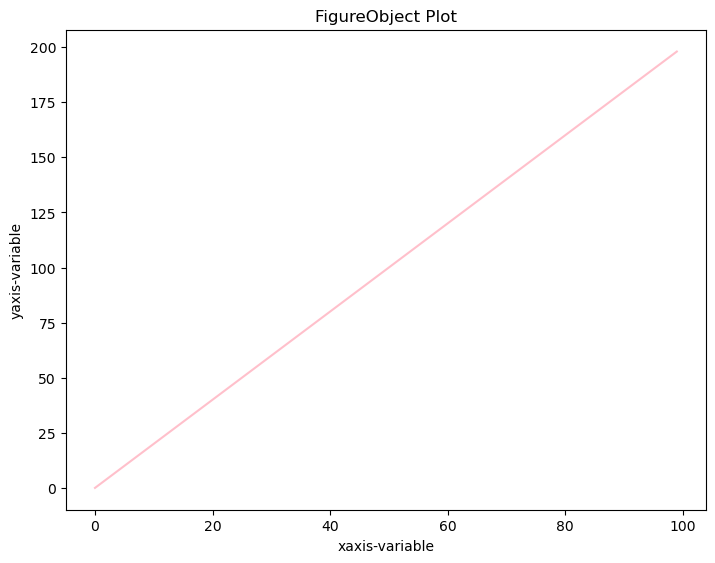

In [90]:
#Q74: "Create a figure object called fig using plt.figure()** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax.** Plot (x,y) on that axes and set the labels.
# Note : You can plot on any x,y set of values.

x = np.arange(0,100)
y = x*2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y, color =('pink'))
ax.set_xlabel('xaxis-variable')
ax.set_ylabel('yaxis-variable')
ax.set_title('FigureObject Plot')


In [89]:
#Q75: "Using numpy functions, multiply the following arrays

a = np.arange(6).reshape(2, 3)
b = np.arange(6).reshape(3, 2)

MultiplyingArray = np.dot(a, b)

print(MultiplyingArray)


[[10 13]
 [28 40]]


In [82]:
#Q76: Mortality O:E

observed_mortality = (df4['DischargeDisposition'] == 'Expired').sum()
print('Observed Mortality is: ',observed_mortality)
oe_mortality = observed_mortality / (df4['ExpectedMortality']).sum()
print('Mortality O:E is ',oe_mortality)

Observed Mortality is:  104
Mortality O:E is  0.4272709474250124


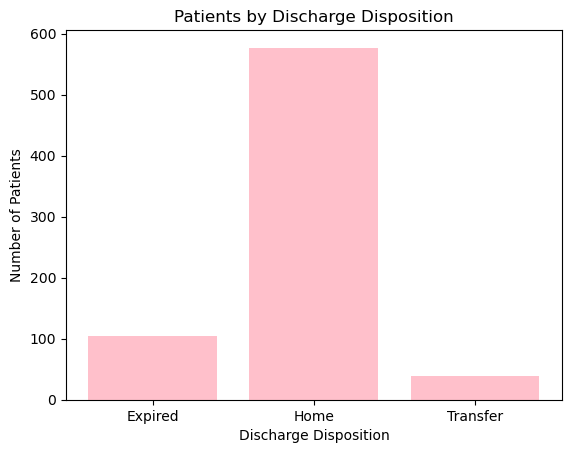

In [88]:
#Q77: Plot a graph to count the patients based on discharge disposition.

discharge_dispositions = df5['DischargeDisposition'].unique()
#print(discharge_dispositions)
patient_counts = df5.groupby('DischargeDisposition').size()
#print(patient_counts)

plt.bar(discharge_dispositions, patient_counts, color =('pink'))
plt.title('Patients by Discharge Disposition')
plt.xlabel('Discharge Disposition')
plt.ylabel('Number of Patients')

plt.show()

In [84]:
#Q78: Display total count of patients service wise based on gender.

merged_df = pd.merge(df1, df5, on='PatientID')

count_by_service_and_gender = merged_df.groupby(['Service', 'Gender']).size()

print(count_by_service_and_gender)

Service           Gender
Cardiology        Female     41
                  Male       54
General Medicine  Female    114
                  Male      149
Hospitalist       Female     35
                  Male       66
ICU               Female     65
                  Male       86
Neurology         Female     34
                  Male       31
Orthopeadics      Female     22
                  Male       23
dtype: int64


In [85]:
#Q79: Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

pd.pivot_table(df4, values='ExpectedLOS', index=['Service'], columns=['PrimaryDiagnosis'], \
                   aggfunc='mean', fill_value='', margins=False,\
                   dropna=True, margins_name='All', observed=False, sort=True)


PrimaryDiagnosis        AMI      Afib Broken Leg  Diabetes     Fever  \
Service                                                                
Cardiology        12.414202  13.16292   3.911826                       
General Medicine                        3.368132  5.665298  6.803796   
Hospitalist        13.82829             7.125069  7.874359  8.865651   
ICU               12.503213  9.651522                       3.860693   
Neurology         10.482847                                            
Orthopeadics                                                           

PrimaryDiagnosis       Flu Heart Failure Hip Fracture Hypertension  \
Service                                                              
Cardiology        3.970428     13.014044                             
General Medicine  6.141753                                5.369365   
Hospitalist       7.033979                                7.864913   
ICU               4.953871      12.78462                  5.092533   
Neurology         6.700593     12.737565                  4.276454   
Orthopeadics                                 3.474971                

PrimaryDiagnosis Kidney Failure Knee Replacement Laceration   Migraine  \
Service                                                                  
Cardiology             6.580273                                          
General Medicine       5.943163                    6.771154              
Hospitalist            7.850346         2.255705    7.06936              
ICU                    9.045995                   10.101443              
Neurology                                                    12.202213   
Orthopeadics                            3.702839                         

PrimaryDiagnosis       Pain  Pneumonia Spinal Cord Injury     Stroke  
Service                                                               
Cardiology                                                            
General Medicine               6.14027                      7.173333  
Hospitalist                    8.14624                     15.349671  
ICU                          13.523626           15.27654  13.297978  
Neurology         11.441453    7.52733                     12.745608  
Orthopeadics

In [87]:
#Q80: Display the data for all 'White Female' patients above the age of 50.

# This function converts given date to age
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
 
df1['Age'] = df1['DateOfBirth'].apply(age)

white_females_above_50 = df1[(df1['Race'] == 'White') & (df1['Gender'] == 'Female') & (df1['Age'] > 50)]

print(white_females_above_50)

     PatientID  FirstName   LastName             DateOfBirth  Gender   Race  \
28          29        Ted      Scott 1967-12-09 05:01:37.892  Female  White   
30          31      Harry       Ding 1960-10-08 01:42:51.212  Female  White   
33          34        Ted        Hue 1960-11-28 18:05:11.459  Female  White   
34          35       Fred        Tye 1966-04-14 06:01:07.169  Female  White   
39          40  Christian        Pow 1971-12-07 11:47:43.885  Female  White   
..         ...        ...        ...                     ...     ...    ...   
865        866   Jermayne    Lowndes 1970-12-09 04:49:48.933  Female  White   
866        867       Gail        Inc 1967-03-10 08:18:47.908  Female  White   
867        868        Des  Heindrick 1969-08-15 11:05:30.165  Female  White   
869        870      Hauck    Rubbens 1963-11-16 03:31:38.929  Female  White   
873        874  Schroeder   McGarvey 1971-12-09 11:56:22.068  Female  White   

    Language  Age  
28   Spanish   55  
30   Spanis